In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_excel('_cotacoes_completa_diario.xlsx')

In [5]:
dados = data[['time', 'open IBOV', 'high IBOV', 'low IBOV', 'close IBOV','volume IBOV']].copy()

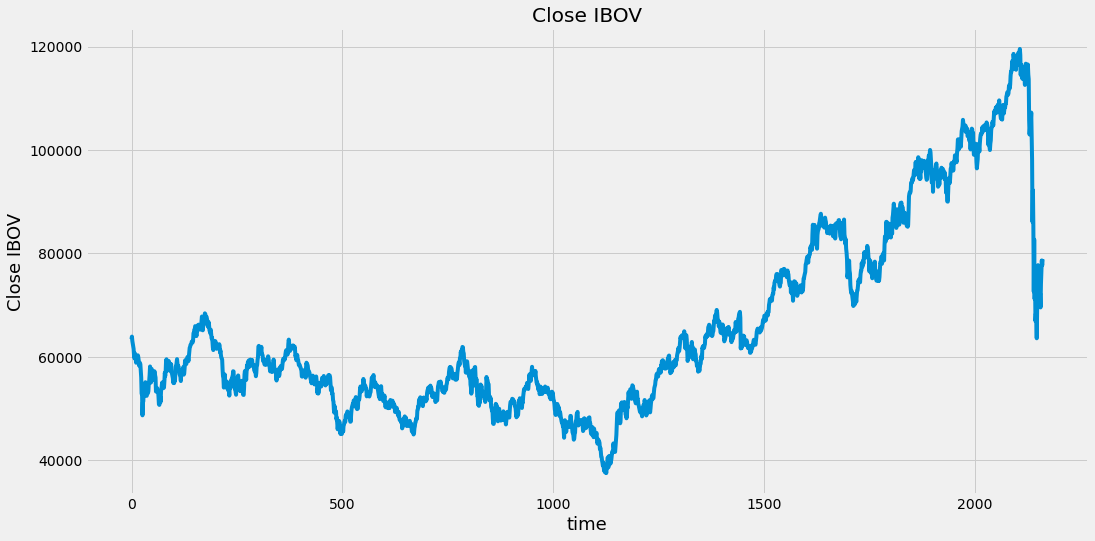

In [14]:
plt.figure(figsize=(16,8))
plt.title('Close IBOV')
plt.plot(dados['close IBOV'])
plt.xlabel('time',fontsize=18)
plt.ylabel('Close IBOV',fontsize=18)
plt.show()

In [17]:
ibov = dados.filter(['close IBOV'])
dataset = ibov.values
training_data_len = math.ceil(len(dataset)*.8)

#scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

#split 

train_data = scaled_data[0:training_data_len, :]

In [18]:
#split xtrain and ytrain
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

#convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


#reshape to the way accepted in lstm
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [19]:
#creating the lstm model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [20]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
#train the model 
model.fit(x_train, y_train, batch_size=2, epochs=4)

Epoch 1/4
1670/1670 [==============================] - 90s 54ms/step - loss: 0.0012
Epoch 2/4
1670/1670 [==============================] - 93s 55ms/step - loss: 4.2939e-04
Epoch 3/4
1670/1670 [==============================] - 93s 56ms/step - loss: 3.8826e-04
Epoch 4/4
1670/1670 [==============================] - 93s 56ms/step - loss: 2.4721e-04


In [ ]:
model.fit(x_train, y_train, batch_size=2, epochs=4)

Epoch 1/4
1670/1670 [==============================] - 94s 56ms/step - loss: 2.3199e-04
Epoch 2/4
 990/1670 [================>.............] - ETA: 38s - loss: 2.4689e-04

In [ ]:
x_test = np.array(x_test)
#reshape 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))